<a href="https://colab.research.google.com/github/sachinibuddhika/GIS_analysis_project/blob/main/GIS_Project_San_Francisco_Police_Department_Incident_Reports.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Library

In [ ]:
!pip install folium matplotlib mapclassify

In [ ]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import folium
import mapclassify

# import csv files



```
# This is formatted as code
```

## Mount google drive

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#paths
DATASET_PATH = '/content/drive/MyDrive/Colab Notebooks/GIS/Group Assignment/data set/'
INCIDENTS_FILE = 'Police_Department_Incident_Reports__2018_to_Present.csv'
SCHOOLS_FILE  = 'Schools.csv'
COLLEGES_FILE = 'Schools_College.csv'
DISTRICTS_FILE = 'SF_Police_districts.csv'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## read csv files

### Police_Department_Incident_Reports__2018_to_Present.csv

In [ ]:
incidents_df = pd.read_csv(DATASET_PATH + INCIDENTS_FILE)
incidents_df.head()

,Incident Datetime,Incident Date,Incident Time,Incident Year,Incident Day of Week,Report Datetime,Row ID,Incident ID,Incident Number,CAD Number,...,Longitude,Point,Neighborhoods,ESNCAG - Boundary File,Central Market/Tenderloin Boundary Polygon - Updated,Civic Center Harm Reduction Project Boundary,HSOC Zones as of 2018-06-05,Invest In Neighborhoods (IIN) Areas,Current Supervisor Districts,Current Police Districts
0,2021/09/29 12:59:00 PM,2021/09/29,12:59,2021,Wednesday,2021/09/29 06:48:00 PM,107597928150,1075979,216138427,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2021/05/14 01:51:00 AM,2021/05/14,01:51,2021,Friday,2021/05/14 01:57:00 AM,103010326030,1030103,210295348,211340138.0,...,-122.387373,POINT (-122.38737260846696 37.74425940578451),56.0,NaN,NaN,NaN,NaN,NaN,9.0,2.0
2,2021/03/01 08:00:00 AM,2021/03/01,08:00,2021,Monday,2021/09/26 11:40:00 AM,107606971000,1076069,216138659,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2021/04/01 12:00:00 PM,2021/04/01,12:00,2021,Thursday,2021/05/04 09:22:00 AM,102792271000,1027922,216049830,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2021/06/01 07:01:00 AM,2021/06/01,07:01,2021,Tuesday,2021/09/19 06:21:00 AM,107592206244,1075922,216138552,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
incidents_df.columns

Index(['Incident Datetime', 'Incident Date', 'Incident Time', 'Incident Year',
       'Incident Day of Week', 'Report Datetime', 'Row ID', 'Incident ID',
       'Incident Number', 'CAD Number', 'Report Type Code',
       'Report Type Description', 'Filed Online', 'Incident Code',
       'Incident Category', 'Incident Subcategory', 'Incident Description',
       'Resolution', 'Intersection', 'CNN', 'Police District',
       'Analysis Neighborhood', 'Supervisor District', 'Latitude', 'Longitude',
       'Point', 'Neighborhoods', 'ESNCAG - Boundary File',
       'Central Market/Tenderloin Boundary Polygon - Updated',
       'Civic Center Harm Reduction Project Boundary',
       'HSOC Zones as of 2018-06-05', 'Invest In Neighborhoods (IIN) Areas',
       'Current Supervisor Districts', 'Current Police Districts'],
      dtype='object')

### SF_Police_districts.csv

In [ ]:
police_location_df = pd.read_csv(DATASET_PATH + DISTRICTS_FILE)
police_location_df.head()

,COMPANY,the_geom,Shape_Leng,DISTRICT,Shape_Le_1,Shape_Area
0,B,MULTIPOLYGON (((-122.39186138812263 37.7942468...,87550.275142,SOUTHERN,100231.353916,9.134414e+07
1,C,MULTIPOLYGON (((-122.38098281360058 37.7648002...,163013.798332,BAYVIEW,144143.480351,2.013846e+08
2,D,MULTIPOLYGON (((-122.40953917435229 37.7693177...,40152.783389,MISSION,40518.834235,8.062384e+07
3,E,MULTIPOLYGON (((-122.43379217152915 37.8079301...,56493.858208,NORTHERN,50608.310321,8.278169e+07
4,J,MULTIPOLYGON (((-122.40217133081705 37.7862601...,12424.268969,TENDERLOIN,18796.784185,1.107215e+07


In [ ]:
police_location_df.columns

Index(['COMPANY', 'the_geom', 'Shape_Leng', 'DISTRICT', 'Shape_Le_1',
       'Shape_Area'],
      dtype='object')

### Schools.csv

In [ ]:
schools_df = pd.read_csv(DATASET_PATH+SCHOOLS_FILE)
schools_df.head()

,Campus Name,CCSF Entity,Lower Grade,Upper Grade,Grade Range,Category,Map Label,Lower Age,Upper Age,General Type,...,Campus Address,Supervisor District,County FIPS,County Name,Location 1,Neighborhoods (old),Zip Codes,Fire Prevention Districts,Police Districts,Supervisor Districts
0,"Milk, Harvey Milk Childrens Center",SFUSD,-2,-1,PK,USD PreK,CDC095,3,4,CDC,...,"841 ELLIS ST, SAN FRANCISCO CA 94117",6,6075,SAN FRANCISCO,"CA\n(37.783802, -122.420105)",36,28858,7.0,9.0,9
1,Mckinley Elementary School,SFUSD,0,5,K-5,USD Grades K-5,PS075,5,10,PS,...,"1025 14TH ST, San Francisco, CA 94114",8,6075,SAN FRANCISCO,"CA\n(37.766884, -122.436279)",3,28862,15.0,5.0,5
2,Jewish Community Center San Francisco - Rosenb...,Private,-2,-1,PK,Independent / Private,CDC058,3,4,CDC,...,"325 ARGUELLO BLVD, SAN FRANCISCO, CA 94118",1,6075,SAN FRANCISCO,"CA\n(37.784588, -122.459488)",11,54,11.0,6.0,2
3,Eureka Learning Center,Private,-2,-1,PK,Independent / Private,CDC035,3,4,CDC,...,"464 DIAMOND ST, SAN FRANCISCO, CA 94114",8,6075,SAN FRANCISCO,"CA\n(37.754967, -122.437004)",22,28862,2.0,4.0,5
4,Noriega Early Education School,SFUSD,-2,5,PK-5,USD PreK/TK-5,PS085,3,10,PS,...,"1775 44TH AVE, San Francisco, CA 94122",4,6075,SAN FRANCISCO,"CA\n(37.753834, -122.503654)",35,56,1.0,8.0,3


In [ ]:
schools_df.columns

Index(['Campus Name', 'CCSF Entity', 'Lower Grade', 'Upper Grade',
       'Grade Range', 'Category', 'Map Label', 'Lower Age', 'Upper Age',
       'General Type', 'CDS Code', 'Campus Address', 'Supervisor District',
       'County FIPS', 'County Name', 'Location 1', 'Neighborhoods (old)',
       'Zip Codes', 'Fire Prevention Districts', 'Police Districts',
       'Supervisor Districts'],
      dtype='object')

### Schools_College.csv

In [ ]:
schools_college_df = pd.read_csv(DATASET_PATH + COLLEGES_FILE)
schools_college_df.head()

,the_geom,institutio,campus,address,webaddress,phone,st_area_sh,st_length_
0,MULTIPOLYGON (((-122.41422959861103 37.7811707...,University of California Hastings College of Law,<Null>,100 McAllister St,www.uchastings.edu,4155654600,13049.073407,492.593768
1,MULTIPOLYGON (((-122.41529196158669 37.7812009...,University of California Hastings College of Law,<Null>,198 McAllister St,www.uchastings.edu,4155654600,22642.056685,604.439178
2,MULTIPOLYGON (((-122.41701008790089 37.7813667...,University of California Hastings College of Law,<Null>,376 Larkin St,www.uchastings.edu,4155654600,25762.162205,650.066091
3,MULTIPOLYGON (((-122.41054924969892 37.8078130...,Academy of Art University,NaN,2300 Stockton St,NaN,0,37469.166147,821.907182
4,MULTIPOLYGON (((-122.41521002465295 37.8034172...,Academy of Art University,NaN,701 Chestnut St,NaN,0,10364.131930,432.953369


In [ ]:
schools_college_df.columns

Index(['the_geom', 'institutio', 'campus', 'address', 'webaddress', 'phone',
       'st_area_sh', 'st_length_'],
      dtype='object')

# Preprocess Data

## incidents_df

In [ ]:
#drop unwanted columns
incidents_df = incidents_df.drop(['Row ID', 'Incident ID', 'Incident Number',
                                  'CAD Number', 'Report Type Code',
                                  'Report Type Description', 'Filed Online',
                                  'CNN', 'Analysis Neighborhood', 'Longitude','Latitude',
                                  'ESNCAG - Boundary File', 'Neighborhoods',
                                  'HSOC Zones as of 2018-06-05',
                                  'Invest In Neighborhoods (IIN) Areas',
                                  'Civic Center Harm Reduction Project Boundary',
                                  'Central Market/Tenderloin Boundary Polygon - Updated'],
                                 axis=1)

#incidents_df['Incident Datetime'] = pd.to_datetime(incidents_df['Incident Datetime'])
#incidents_df['Report Datetime'] = pd.to_datetime(incidents_df['Report Datetime'])

incidents_df

,Incident Datetime,Incident Date,Incident Time,Incident Year,Incident Day of Week,Report Datetime,Incident Code,Incident Category,Incident Subcategory,Incident Description,Resolution,Intersection,Police District,Supervisor District,Point,Current Supervisor Districts,Current Police Districts
0,2021/09/29 12:59:00 PM,2021/09/29,12:59,2021,Wednesday,2021/09/29 06:48:00 PM,28150,Malicious Mischief,Vandalism,"Malicious Mischief, Vandalism to Property",Open or Active,NaN,Ingleside,NaN,NaN,NaN,NaN
1,2021/05/14 01:51:00 AM,2021/05/14,01:51,2021,Friday,2021/05/14 01:57:00 AM,26030,Arson,Arson,Arson,Open or Active,03RD ST \ CUSTER AVE,Bayview,10.0,POINT (-122.38737260846696 37.74425940578451),9.0,2.0
2,2021/03/01 08:00:00 AM,2021/03/01,08:00,2021,Monday,2021/09/26 11:40:00 AM,71000,Lost Property,Lost Property,Lost Property,Open or Active,NaN,Southern,NaN,NaN,NaN,NaN
3,2021/04/01 12:00:00 PM,2021/04/01,12:00,2021,Thursday,2021/05/04 09:22:00 AM,71000,Lost Property,Lost Property,Lost Property,Open or Active,NaN,Park,NaN,NaN,NaN,NaN
4,2021/06/01 07:01:00 AM,2021/06/01,07:01,2021,Tuesday,2021/09/19 06:21:00 AM,6244,Larceny Theft,Larceny - From Vehicle,"Theft, From Locked Vehicle, >$950",Open or Active,NaN,Southern,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566240,2021/01/15 08:00:00 PM,2021/01/15,20:00,2021,Friday,2021/01/18 11:03:00 PM,3074,Robbery,Robbery - Other,"Robbery, W/ Force",Cite or Arrest Adult,OFARRELL ST \ SHANNON ST,Tenderloin,6.0,POINT (-122.41214750780264 37.78589292711297),10.0,5.0
566241,2020/08/01 05:34:00 PM,2020/08/01,17:34,2020,Saturday,2020/08/01 06:04:00 PM,6361,Larceny Theft,Larceny Theft - Shoplifting,"Theft, Shoplifting, <$50",Open or Active,GEARY BLVD \ 17TH AVE,Richmond,1.0,POINT (-122.47616919036905 37.780475849410344),4.0,8.0
566242,2020/06/01 01:55:00 AM,2020/06/01,01:55,2020,Monday,2020/06/01 01:55:00 AM,5061,Burglary,Burglary - Commercial,"Burglary, Warehouse, Forcible Entry",Open or Active,24TH ST \ MINNESOTA ST,Bayview,10.0,POINT (-122.38985954971992 37.75399971361786),9.0,2.0
566243,2020/10/24 05:00:00 PM,2020/10/24,17:00,2020,Saturday,2020/10/24 06:34:00 PM,6244,Larceny Theft,Larceny - From Vehicle,"Theft, From Locked Vehicle, >$950",Open or Active,STEINER ST \ FULTON ST,Northern,5.0,POINT (-122.43321873935555 37.777490366353746),11.0,4.0


In [ ]:
incidents_df['Police District'] = incidents_df['Police District'].str.upper()

In [ ]:
# Get the count of null values in each column
null_counts = incidents_df.isnull().sum()

# Display the result
print(null_counts)

Incident Datetime                   0
Incident Date                       0
Incident Time                       0
Incident Year                       0
Incident Day of Week                0
Report Datetime                     0
Incident Code                       0
Incident Category                 484
Incident Subcategory              484
Incident Description                0
Resolution                          0
Intersection                    29265
Police District                     0
Supervisor District             29265
Point                           29265
Current Supervisor Districts    29354
Current Police Districts        29939
dtype: int64


In [ ]:
#remove null rows in Points column
incidents_df.dropna(subset=['Point'], inplace=True)

## police_location_df

In [ ]:
#drop unwanted columns
police_location_df.drop(['COMPANY', 'Shape_Leng','Shape_Le_1'], axis=1,inplace=True)

In [ ]:
police_location_df


,the_geom,DISTRICT,Shape_Area
0,MULTIPOLYGON (((-122.39186138812263 37.7942468...,SOUTHERN,9.134414e+07
1,MULTIPOLYGON (((-122.38098281360058 37.7648002...,BAYVIEW,2.013846e+08
2,MULTIPOLYGON (((-122.40953917435229 37.7693177...,MISSION,8.062384e+07
3,MULTIPOLYGON (((-122.43379217152915 37.8079301...,NORTHERN,8.278169e+07
4,MULTIPOLYGON (((-122.40217133081705 37.7862601...,TENDERLOIN,1.107215e+07
5,MULTIPOLYGON (((-122.42612039096105 37.8068385...,CENTRAL,5.595027e+07
6,MULTIPOLYGON (((-122.43955630942153 37.7831382...,PARK,8.487896e+07
7,MULTIPOLYGON (((-122.44126871380196 37.7914898...,RICHMOND,1.379640e+08
8,MULTIPOLYGON (((-122.40449818754264 37.7485809...,INGLESIDE,1.935805e+08
9,MULTIPOLYGON (((-122.49841667062083 37.7081046...,TARAVAL,2.846767e+08


## schools_df

In [ ]:
#drop unwanted columns
schools_df.drop(columns=['Location 1', 'Map Label', 'CDS Code',
                                      'General Type', 'County Name', 'County FIPS',
                                      'Neighborhoods (old)', 'Zip Codes'],
                             axis=1,inplace=True)

In [ ]:
schools_df

,Campus Name,CCSF Entity,Lower Grade,Upper Grade,Grade Range,Category,Lower Age,Upper Age,Campus Address,Supervisor District,Fire Prevention Districts,Police Districts,Supervisor Districts
0,"Milk, Harvey Milk Childrens Center",SFUSD,-2,-1,PK,USD PreK,3,4,"841 ELLIS ST, SAN FRANCISCO CA 94117",6,7.0,9.0,9
1,Mckinley Elementary School,SFUSD,0,5,K-5,USD Grades K-5,5,10,"1025 14TH ST, San Francisco, CA 94114",8,15.0,5.0,5
2,Jewish Community Center San Francisco - Rosenb...,Private,-2,-1,PK,Independent / Private,3,4,"325 ARGUELLO BLVD, SAN FRANCISCO, CA 94118",1,11.0,6.0,2
3,Eureka Learning Center,Private,-2,-1,PK,Independent / Private,3,4,"464 DIAMOND ST, SAN FRANCISCO, CA 94114",8,2.0,4.0,5
4,Noriega Early Education School,SFUSD,-2,5,PK-5,USD PreK/TK-5,3,10,"1775 44TH AVE, San Francisco, CA 94122",4,1.0,8.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
440,Golden Gate Guppies Preschool,Private,-2,-1,PK,Independent / Private,3,4,"2426 CALIFORNIA ST, SAN FRANCISCO, CA 94115",2,13.0,9.0,1
441,Lands End School,Private,-2,-1,PK,Independent / Private,3,4,"4150 CLEMENT ST BLDG T35, SAN FRANCISCO, CA 94121",1,11.0,6.0,2
442,San Francisco Pacific Academy,Private,0,8,K-8,Independent / Private,5,13,"3301 BALBOA ST, SAN FRANCISCO, CA 94121",1,11.0,6.0,2
443,"Wells, Ida B. Wells High School",SFUSD,9,12,9-12,USD Grades 9-12,14,17,"1099 HAYES ST, SAN FRANCISCO, CA 94117",5,15.0,5.0,11


# Cordinate Reference system

## incidents_df

In [ ]:
incidents_df['geometry'] = gpd.GeoSeries.from_wkt(incidents_df['Point'].astype('str'))
incidents_gdf = gpd.GeoDataFrame(incidents_df, crs = "EPSG: 4326")     #EPSG: 4326 cordinate refference system
incidents_gdf

,Incident Datetime,Incident Date,Incident Time,Incident Year,Incident Day of Week,Report Datetime,Incident Code,Incident Category,Incident Subcategory,Incident Description,Resolution,Intersection,Police District,Supervisor District,Point,Current Supervisor Districts,Current Police Districts,geometry
1,2021/05/14 01:51:00 AM,2021/05/14,01:51,2021,Friday,2021/05/14 01:57:00 AM,26030,Arson,Arson,Arson,Open or Active,03RD ST \ CUSTER AVE,BAYVIEW,10.0,POINT (-122.38737260846696 37.74425940578451),9.0,2.0,POINT (-122.38737 37.74426)
12,2021/05/14 06:00:00 AM,2021/05/14,06:00,2021,Friday,2021/05/14 08:03:00 PM,64070,Suspicious Occ,Suspicious Occ,Suspicious Occurrence,Open or Active,STEUART ST \ MISSION ST,CENTRAL,3.0,POINT (-122.3931813328012 37.79323049132005),3.0,1.0,POINT (-122.39318 37.79323)
13,2021/05/14 12:02:00 PM,2021/05/14,12:02,2021,Friday,2021/05/14 01:09:00 PM,27195,Other Miscellaneous,Trespass,Trespassing,Open or Active,BRANNAN ST \ 08TH ST,SOUTHERN,6.0,POINT (-122.40542473566995 37.77129635185078),10.0,1.0,POINT (-122.40542 37.77130)
14,2021/05/14 02:45:00 PM,2021/05/14,14:45,2021,Friday,2021/05/14 04:53:00 PM,7055,Motor Vehicle Theft,Motor Vehicle Theft,"Vehicle, Recovered, Stolen outside SF",Open or Active,NEWCOMB AVE \ BARNEVELD AVE,BAYVIEW,10.0,POINT (-122.40327519404315 37.74312376235638),9.0,2.0,POINT (-122.40328 37.74312)
15,2021/05/14 02:24:00 AM,2021/05/14,02:24,2021,Friday,2021/05/14 02:30:00 AM,64020,Non-Criminal,Other,Mental Health Detention,Open or Active,ESSEX ST \ FOLSOM ST,SOUTHERN,6.0,POINT (-122.39564546789741 37.78637893587979),10.0,1.0,POINT (-122.39565 37.78638)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566240,2021/01/15 08:00:00 PM,2021/01/15,20:00,2021,Friday,2021/01/18 11:03:00 PM,3074,Robbery,Robbery - Other,"Robbery, W/ Force",Cite or Arrest Adult,OFARRELL ST \ SHANNON ST,TENDERLOIN,6.0,POINT (-122.41214750780264 37.78589292711297),10.0,5.0,POINT (-122.41215 37.78589)
566241,2020/08/01 05:34:00 PM,2020/08/01,17:34,2020,Saturday,2020/08/01 06:04:00 PM,6361,Larceny Theft,Larceny Theft - Shoplifting,"Theft, Shoplifting, <$50",Open or Active,GEARY BLVD \ 17TH AVE,RICHMOND,1.0,POINT (-122.47616919036905 37.780475849410344),4.0,8.0,POINT (-122.47617 37.78048)
566242,2020/06/01 01:55:00 AM,2020/06/01,01:55,2020,Monday,2020/06/01 01:55:00 AM,5061,Burglary,Burglary - Commercial,"Burglary, Warehouse, Forcible Entry",Open or Active,24TH ST \ MINNESOTA ST,BAYVIEW,10.0,POINT (-122.38985954971992 37.75399971361786),9.0,2.0,POINT (-122.38986 37.75400)
566243,2020/10/24 05:00:00 PM,2020/10/24,17:00,2020,Saturday,2020/10/24 06:34:00 PM,6244,Larceny Theft,Larceny - From Vehicle,"Theft, From Locked Vehicle, >$950",Open or Active,STEINER ST \ FULTON ST,NORTHERN,5.0,POINT (-122.43321873935555 37.777490366353746),11.0,4.0,POINT (-122.43322 37.77749)


## police_location_df

In [ ]:
police_location_df['geometry'] = gpd.GeoSeries.from_wkt(police_location_df['the_geom'].astype('str'))
police_location_gdf = gpd.GeoDataFrame(police_location_df, crs = "EPSG: 4326")     #EPSG: 4326 cordinate refference system
police_location_gdf

,the_geom,DISTRICT,Shape_Area,geometry
0,MULTIPOLYGON (((-122.39186138812263 37.7942468...,SOUTHERN,9.134414e+07,"MULTIPOLYGON (((-122.39186 37.79425, -122.3917..."
1,MULTIPOLYGON (((-122.38098281360058 37.7648002...,BAYVIEW,2.013846e+08,"MULTIPOLYGON (((-122.38098 37.76480, -122.3810..."
2,MULTIPOLYGON (((-122.40953917435229 37.7693177...,MISSION,8.062384e+07,"MULTIPOLYGON (((-122.40954 37.76932, -122.4086..."
3,MULTIPOLYGON (((-122.43379217152915 37.8079301...,NORTHERN,8.278169e+07,"MULTIPOLYGON (((-122.43379 37.80793, -122.4337..."
4,MULTIPOLYGON (((-122.40217133081705 37.7862601...,TENDERLOIN,1.107215e+07,"MULTIPOLYGON (((-122.40217 37.78626, -122.4171..."
5,MULTIPOLYGON (((-122.42612039096105 37.8068385...,CENTRAL,5.595027e+07,"MULTIPOLYGON (((-122.42612 37.80684, -122.4261..."
6,MULTIPOLYGON (((-122.43955630942153 37.7831382...,PARK,8.487896e+07,"MULTIPOLYGON (((-122.43956 37.78314, -122.4383..."
7,MULTIPOLYGON (((-122.44126871380196 37.7914898...,RICHMOND,1.379640e+08,"MULTIPOLYGON (((-122.44127 37.79149, -122.4406..."
8,MULTIPOLYGON (((-122.40449818754264 37.7485809...,INGLESIDE,1.935805e+08,"MULTIPOLYGON (((-122.40450 37.74858, -122.4040..."
9,MULTIPOLYGON (((-122.49841667062083 37.7081046...,TARAVAL,2.846767e+08,"MULTIPOLYGON (((-122.49842 37.70810, -122.4984..."


# Analysis 1 - sachini


In [ ]:
# Perform a spatial join with police districts
joined_data = gpd.sjoin(police_location_gdf, incidents_gdf, how='left', op='intersects')
joined_data

/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py:3473: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):


,the_geom,DISTRICT,Shape_Area,geometry,index_right,Incident Datetime,Incident Date,Incident Time,Incident Year,Incident Day of Week,...,Incident Category,Incident Subcategory,Incident Description,Resolution,Intersection,Police District,Supervisor District,Point,Current Supervisor Districts,Current Police Districts
0,MULTIPOLYGON (((-122.39186138812263 37.7942468...,SOUTHERN,9.134414e+07,"MULTIPOLYGON (((-122.39186 37.79425, -122.3917...",270284,2019/02/19 12:00:00 PM,2019/02/19,12:00,2019,Tuesday,...,Other,Other,"Death Report, Cause Unknown",Open or Active,ELGIN PARK \ MCCOPPIN ST,SOUTHERN,8.0,POINT (-122.42333489741378 37.77147797080469),5.0,1.0
0,MULTIPOLYGON (((-122.39186138812263 37.7942468...,SOUTHERN,9.134414e+07,"MULTIPOLYGON (((-122.39186 37.79425, -122.3917...",80891,2021/12/06 05:00:00 PM,2021/12/06,17:00,2021,Monday,...,Larceny Theft,Larceny Theft - From Building,"Theft, From Building, $200-$950",Open or Active,ELGIN PARK \ MCCOPPIN ST,MISSION,8.0,POINT (-122.42333489741378 37.77147797080469),5.0,1.0
0,MULTIPOLYGON (((-122.39186138812263 37.7942468...,SOUTHERN,9.134414e+07,"MULTIPOLYGON (((-122.39186 37.79425, -122.3917...",10640,2021/05/31 12:01:00 AM,2021/05/31,00:01,2021,Monday,...,Assault,Simple Assault,Battery,Open or Active,ELGIN PARK \ MCCOPPIN ST,SOUTHERN,8.0,POINT (-122.42333489741378 37.77147797080469),5.0,1.0
0,MULTIPOLYGON (((-122.39186138812263 37.7942468...,SOUTHERN,9.134414e+07,"MULTIPOLYGON (((-122.39186 37.79425, -122.3917...",92464,2022/01/13 09:49:00 PM,2022/01/13,21:49,2022,Thursday,...,Arson,Arson,Arson,Open or Active,ELGIN PARK \ MCCOPPIN ST,SOUTHERN,8.0,POINT (-122.42333489741378 37.77147797080469),5.0,1.0
0,MULTIPOLYGON (((-122.39186138812263 37.7942468...,SOUTHERN,9.134414e+07,"MULTIPOLYGON (((-122.39186 37.79425, -122.3917...",65235,2021/08/24 06:20:00 PM,2021/08/24,18:20,2021,Tuesday,...,Non-Criminal,Other,"Dog, Bite or Attack",Open or Active,ELGIN PARK \ MCCOPPIN ST,SOUTHERN,8.0,POINT (-122.42333489741378 37.77147797080469),5.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9,MULTIPOLYGON (((-122.49841667062083 37.7081046...,TARAVAL,2.846767e+08,"MULTIPOLYGON (((-122.49842 37.70810, -122.4984...",489871,2020/05/28 01:00:00 PM,2020/05/28,13:00,2020,Thursday,...,Missing Person,Missing Adult,Missing Adult,Open or Active,FUNSTON AVE \ LINCOLN WAY,TARAVAL,5.0,POINT (-122.47072725986746 37.76573925273299),11.0,10.0
9,MULTIPOLYGON (((-122.49841667062083 37.7081046...,TARAVAL,2.846767e+08,"MULTIPOLYGON (((-122.49842 37.70810, -122.4984...",441960,2020/04/26 05:14:00 PM,2020/04/26,17:14,2020,Sunday,...,Other Miscellaneous,Other,Investigative Detention,Open or Active,FUNSTON AVE \ LINCOLN WAY,TARAVAL,5.0,POINT (-122.47072725986746 37.76573925273299),11.0,10.0
9,MULTIPOLYGON (((-122.49841667062083 37.7081046...,TARAVAL,2.846767e+08,"MULTIPOLYGON (((-122.49842 37.70810, -122.4984...",98652,2022/02/01 02:24:00 AM,2022/02/01,02:24,2022,Tuesday,...,Weapons Offense,Weapons Offense,"Weapon, Deadly, Imitation or Laser Scope, Exhi...",Cite or Arrest Adult,FUNSTON AVE \ LINCOLN WAY,TARAVAL,5.0,POINT (-122.47072725986746 37.76573925273299),11.0,10.0
9,MULTIPOLYGON (((-122.49841667062083 37.7081046...,TARAVAL,2.846767e+08,"MULTIPOLYGON (((-122.49842 37.70810, -122.4984...",108911,2022/03/01 01:52:00 PM,2022/03/01,13:52,2022,Tuesday,...,Recovered Vehicle,Recovered Vehicle,"Vehicle, Recovered, Motorcycle",Open or Active,IRVING ST \ 18TH AVE,TARAVAL,4.0,POINT (-122.47605438021377 37.76360876083487),7.0,10.0


In [ ]:
# Group by police district and count incidents
crime_counts_by_district = joined_data.groupby('DISTRICT').size().reset_index()
crime_counts_by_district.columns = ['DISTRICT', 'CrimeCount']
crime_counts_by_district

,DISTRICT,CrimeCount
0,BAYVIEW,49820
1,CENTRAL,81647
2,INGLESIDE,41407
3,MISSION,71147
4,NORTHERN,76461
5,PARK,25297
6,RICHMOND,31078
7,SOUTHERN,68538
8,TARAVAL,40641
9,TENDERLOIN,50270


In [ ]:
# Calculate crime density by dividing the crime count by the area
crime_counts_by_district['Area'] = police_location_gdf['Shape_Area']  # Replace 'Area' with the actual area column name
crime_counts_by_district['CrimeDensity'] = crime_counts_by_district['CrimeCount'] / crime_counts_by_district['Area']
crime_counts_by_district

,DISTRICT,CrimeCount,Area,CrimeDensity
0,BAYVIEW,49820,9.134414e+07,0.000545
1,CENTRAL,81647,2.013846e+08,0.000405
2,INGLESIDE,41407,8.062384e+07,0.000514
3,MISSION,71147,8.278169e+07,0.000859
4,NORTHERN,76461,1.107215e+07,0.006906
5,PARK,25297,5.595027e+07,0.000452
6,RICHMOND,31078,8.487896e+07,0.000366
7,SOUTHERN,68538,1.379640e+08,0.000497
8,TARAVAL,40641,1.935805e+08,0.000210
9,TENDERLOIN,50270,2.846767e+08,0.000177


In [ ]:
districts_with_density = police_location_gdf.merge(crime_counts_by_district, on='DISTRICT', how='left')
districts_with_density

,the_geom,DISTRICT,Shape_Area,geometry,CrimeCount,Area,CrimeDensity
0,MULTIPOLYGON (((-122.39186138812263 37.7942468...,SOUTHERN,9.134414e+07,"MULTIPOLYGON (((-122.39186 37.79425, -122.3917...",68538,1.379640e+08,0.000497
1,MULTIPOLYGON (((-122.38098281360058 37.7648002...,BAYVIEW,2.013846e+08,"MULTIPOLYGON (((-122.38098 37.76480, -122.3810...",49820,9.134414e+07,0.000545
2,MULTIPOLYGON (((-122.40953917435229 37.7693177...,MISSION,8.062384e+07,"MULTIPOLYGON (((-122.40954 37.76932, -122.4086...",71147,8.278169e+07,0.000859
3,MULTIPOLYGON (((-122.43379217152915 37.8079301...,NORTHERN,8.278169e+07,"MULTIPOLYGON (((-122.43379 37.80793, -122.4337...",76461,1.107215e+07,0.006906
4,MULTIPOLYGON (((-122.40217133081705 37.7862601...,TENDERLOIN,1.107215e+07,"MULTIPOLYGON (((-122.40217 37.78626, -122.4171...",50270,2.846767e+08,0.000177
5,MULTIPOLYGON (((-122.42612039096105 37.8068385...,CENTRAL,5.595027e+07,"MULTIPOLYGON (((-122.42612 37.80684, -122.4261...",81647,2.013846e+08,0.000405
6,MULTIPOLYGON (((-122.43955630942153 37.7831382...,PARK,8.487896e+07,"MULTIPOLYGON (((-122.43956 37.78314, -122.4383...",25297,5.595027e+07,0.000452
7,MULTIPOLYGON (((-122.44126871380196 37.7914898...,RICHMOND,1.379640e+08,"MULTIPOLYGON (((-122.44127 37.79149, -122.4406...",31078,8.487896e+07,0.000366
8,MULTIPOLYGON (((-122.40449818754264 37.7485809...,INGLESIDE,1.935805e+08,"MULTIPOLYGON (((-122.40450 37.74858, -122.4040...",41407,8.062384e+07,0.000514
9,MULTIPOLYGON (((-122.49841667062083 37.7081046...,TARAVAL,2.846767e+08,"MULTIPOLYGON (((-122.49842 37.70810, -122.4984...",40641,1.935805e+08,0.000210


<Axes: >

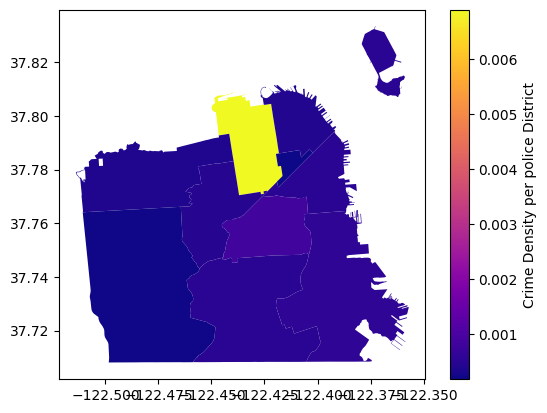

In [ ]:
districts_with_density.plot(column = 'CrimeDensity',legend = True ,cmap = 'plasma', legend_kwds = {'label':"Crime Density per police District"})

In [ ]:
# Create a Folium map
m = folium.Map(location=[37.7749, -122.4194], zoom_start=12)

# Add a choropleth layer for crime density
folium.Choropleth(
    geo_data=districts_with_density,
    name='choropleth',
    data=districts_with_density,
    columns=['DISTRICT', 'CrimeDensity'],
    key_on='feature.properties.DISTRICT',
    fill_color='YlOrRd',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Crime Density'
).add_to(m)

# Display the map
m

# Analysis 3-Rishie

In [ ]:
police_district_names = police_location_df['DISTRICT']
print(police_district_names)

0      SOUTHERN
1       BAYVIEW
2       MISSION
3      NORTHERN
4    TENDERLOIN
5       CENTRAL
6          PARK
7      RICHMOND
8     INGLESIDE
9       TARAVAL
Name: DISTRICT, dtype: object


# Analysis 4 - Lakshan

Mount Google Drive

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Read CSV Files

In [ ]:
#paths
DATASET_PATH = '/content/drive/MyDrive/GIS DATA'
INCIDENTS_FILE = 'Police_Department_Incident_Reports__2018_to_Present.csv'
SCHOOLS_FILE  = 'Schools.csv'
COLLEGES_FILE = 'Schools_College.csv'
DISTRICTS_FILE = 'SF_Police_districts.csv'

# Analysis 5 - Achintha

In [ ]:
sf_map = folium.Map(location=[37.7749, -122.4194], zoom_start=12)
display(sf_map)

In [ ]:
merged_df = incidents_gdf.merge(police_location_gdf, left_on='Police District', right_on='DISTRICT')
merged_df.head()

,Incident Datetime,Incident Date,Incident Time,Incident Year,Incident Day of Week,Report Datetime,Incident Code,Incident Category,Incident Subcategory,Incident Description,...,Police District,Supervisor District,Point,Current Supervisor Districts,Current Police Districts,geometry_x,the_geom,DISTRICT,Shape_Area,geometry_y
0,2021/05/14 01:51:00 AM,2021/05/14,01:51,2021,Friday,2021/05/14 01:57:00 AM,26030,Arson,Arson,Arson,...,BAYVIEW,10.0,POINT (-122.38737260846696 37.74425940578451),9.0,2.0,POINT (-122.38737 37.74426),MULTIPOLYGON (((-122.38098281360058 37.7648002...,BAYVIEW,2.013846e+08,"MULTIPOLYGON (((-122.38098 37.76480, -122.3810..."
1,2021/05/14 02:45:00 PM,2021/05/14,14:45,2021,Friday,2021/05/14 04:53:00 PM,7055,Motor Vehicle Theft,Motor Vehicle Theft,"Vehicle, Recovered, Stolen outside SF",...,BAYVIEW,10.0,POINT (-122.40327519404315 37.74312376235638),9.0,2.0,POINT (-122.40328 37.74312),MULTIPOLYGON (((-122.38098281360058 37.7648002...,BAYVIEW,2.013846e+08,"MULTIPOLYGON (((-122.38098 37.76480, -122.3810..."
2,2021/05/13 08:31:00 PM,2021/05/13,20:31,2021,Thursday,2021/05/13 08:31:00 PM,12100,Weapons Carrying Etc,Weapons Offense,"Firearm, Possession of Loaded",...,BAYVIEW,10.0,POINT (-122.38457148087929 37.71905903668968),9.0,2.0,POINT (-122.38457 37.71906),MULTIPOLYGON (((-122.38098281360058 37.7648002...,BAYVIEW,2.013846e+08,"MULTIPOLYGON (((-122.38098 37.76480, -122.3810..."
3,2021/05/13 11:03:00 PM,2021/05/13,23:03,2021,Thursday,2021/05/13 11:09:00 PM,12027,Weapons Offense,Weapons Offense,"Firearm, Discharging Within City Limits",...,BAYVIEW,10.0,POINT (-122.39667535949232 37.754706578836675),9.0,2.0,POINT (-122.39668 37.75471),MULTIPOLYGON (((-122.38098281360058 37.7648002...,BAYVIEW,2.013846e+08,"MULTIPOLYGON (((-122.38098 37.76480, -122.3810..."
4,2021/05/14 12:11:00 AM,2021/05/14,00:11,2021,Friday,2021/05/14 12:11:00 AM,7046,Recovered Vehicle,Recovered Vehicle,"Vehicle, Recovered, Other Vehicle",...,BAYVIEW,10.0,POINT (-122.3970013283792 37.7428968146528),9.0,2.0,POINT (-122.39700 37.74290),MULTIPOLYGON (((-122.38098281360058 37.7648002...,BAYVIEW,2.013846e+08,"MULTIPOLYGON (((-122.38098 37.76480, -122.3810..."


In [ ]:
# Calculate crime rates per neighborhood (e.g., total incidents per neighborhood)
crime_rates = merged_df['Police District'].value_counts().reset_index()
crime_rates.columns = ['Police District', 'CrimeCount']
crime_rates

,Police District,CrimeCount
0,CENTRAL,80568
1,NORTHERN,75204
2,MISSION,70378
3,SOUTHERN,65425
4,TENDERLOIN,52451
5,BAYVIEW,48941
6,INGLESIDE,42149
7,TARAVAL,38434
8,RICHMOND,32432
9,PARK,25458


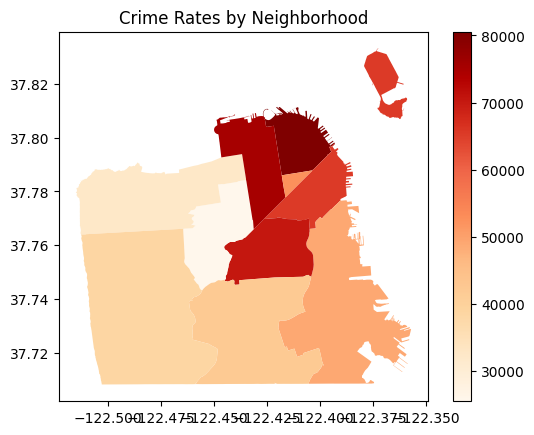

In [ ]:
# Load a shapefile or GeoJSON file for neighborhood boundaries
neighborhood_shapes = gpd.read_file('/content/drive/MyDrive/Colab Notebooks/GIS/Group Assignment/data set/san-francisco.geojson')

# Merge neighborhood shapes with crime rates
neighborhood_shapes = neighborhood_shapes.merge(crime_rates, left_on='DISTRICT', right_on='Police District')

# Create a choropleth map using Geopandas
neighborhood_shapes.plot(column='CrimeCount', cmap='OrRd', linewidth=0.8, legend=True)
plt.title('Crime Rates by Neighborhood')
plt.show()

In [ ]:
# Load a shapefile or GeoJSON file for neighborhood boundaries
neighborhood_shapes = gpd.read_file('/content/drive/MyDrive/Colab Notebooks/GIS/Group Assignment/data set/san-francisco.geojson')

# Create an interactive map using Folium
sf_map = folium.Map(location=[37.7749, -122.4194], zoom_start=12)
folium.Choropleth(
    geo_data='/content/drive/MyDrive/Colab Notebooks/GIS/Group Assignment/data set/san-francisco.geojson',
    data=crime_rates,
    columns=['Police District', 'CrimeCount'],
    key_on='feature.properties.DISTRICT',
    fill_color='YlOrRd',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Crime Rates'
).add_to(sf_map)

display(sf_map)

In [ ]:
incidents_gdf['Incident Date'].dtype

dtype('O')

## crime incidents over time.

In [ ]:
# Perform a spatial join with neighborhood boundaries
joined_data = gpd.sjoin(neighborhood_shapes, incidents_gdf, how='left', op='intersects')
joined_data


/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py:3473: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):


,OBJECTID,DISTRICT,COMPANY,geometry,index_right,Incident Datetime,Incident Date,Incident Time,Incident Year,Incident Day of Week,...,Incident Category,Incident Subcategory,Incident Description,Resolution,Intersection,Police District,Supervisor District,Point,Current Supervisor Districts,Current Police Districts
0,1,CENTRAL,A,"POLYGON ((-122.40532 37.80687, -122.40440 37.8...",1014,2021/05/16 12:32:00 AM,2021/05/16,00:32,2021,Sunday,...,Motor Vehicle Theft,Motor Vehicle Theft,"Vehicle, Stolen, Auto",Open or Active,GEARY ST \ HYDE ST,CENTRAL,6.0,POINT (-122.41644912401847 37.78631021732119),10.0,6.0
0,1,CENTRAL,A,"POLYGON ((-122.40532 37.80687, -122.40440 37.8...",225702,2018/02/21 09:00:00 AM,2018/02/21,09:00,2018,Wednesday,...,Larceny Theft,Larceny Theft - Other,Embezzlement from Dependent or Elder Adult by ...,Open or Active,GEARY ST \ HYDE ST,CENTRAL,6.0,POINT (-122.41644912401847 37.78631021732119),10.0,6.0
0,1,CENTRAL,A,"POLYGON ((-122.40532 37.80687, -122.40440 37.8...",486693,2020/12/25 03:00:00 PM,2020/12/25,15:00,2020,Friday,...,Larceny Theft,Larceny Theft - Other,Looting during State of Emergency,Open or Active,GEARY ST \ HYDE ST,CENTRAL,6.0,POINT (-122.41644912401847 37.78631021732119),10.0,6.0
0,1,CENTRAL,A,"POLYGON ((-122.40532 37.80687, -122.40440 37.8...",527456,2020/07/23 12:00:00 AM,2020/07/23,00:00,2020,Thursday,...,Fraud,Fraud,"Fraudulent Game or Trick, Obtaining Money or P...",Unfounded,GEARY ST \ HYDE ST,OUT OF SF,6.0,POINT (-122.41644912401847 37.78631021732119),10.0,6.0
0,1,CENTRAL,A,"POLYGON ((-122.40532 37.80687, -122.40440 37.8...",175188,2021/03/04 10:00:00 AM,2021/03/04,10:00,2021,Thursday,...,Other,Other,"Death Report, Cause Unknown",Open or Active,GEARY ST \ HYDE ST,CENTRAL,6.0,POINT (-122.41644912401847 37.78631021732119),10.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9,10,TENDERLOIN,J,"POLYGON ((-122.41795 37.78602, -122.41654 37.7...",175965,2018/04/30 05:00:00 PM,2018/04/30,17:00,2018,Monday,...,Larceny Theft,Larceny Theft - Shoplifting,"Theft, Shoplifting, $50-$200",Cite or Arrest Adult,POWELL ST \ OFARRELL ST,CENTRAL,3.0,POINT (-122.40803623744476 37.78640961281089),3.0,6.0
9,10,TENDERLOIN,J,"POLYGON ((-122.41795 37.78602, -122.41654 37.7...",426524,2019/07/01 05:55:00 PM,2019/07/01,17:55,2019,Monday,...,Burglary,Burglary - Commercial,"Burglary, Store, Unlawful Entry",Cite or Arrest Adult,POWELL ST \ OFARRELL ST,CENTRAL,3.0,POINT (-122.40803623744476 37.78640961281089),3.0,6.0
9,10,TENDERLOIN,J,"POLYGON ((-122.41795 37.78602, -122.41654 37.7...",152970,2018/01/02 06:46:00 PM,2018/01/02,18:46,2018,Tuesday,...,Larceny Theft,Larceny Theft - Shoplifting,"Theft, Shoplifting, $200-$950",Cite or Arrest Adult,POWELL ST \ OFARRELL ST,CENTRAL,3.0,POINT (-122.40803623744476 37.78640961281089),3.0,6.0
9,10,TENDERLOIN,J,"POLYGON ((-122.41795 37.78602, -122.41654 37.7...",426502,2020/01/07 10:58:00 AM,2020/01/07,10:58,2020,Tuesday,...,Non-Criminal,Non-Criminal,"Stay Away or Court Order, Non-DV Related",Cite or Arrest Adult,POWELL ST \ OFARRELL ST,CENTRAL,3.0,POINT (-122.40803623744476 37.78640961281089),3.0,6.0


In [ ]:
joined_data.shape

(536181, 22)

In [ ]:
yearly_district_incident_counts = joined_data.groupby(['Incident Year', 'DISTRICT']).size().reset_index()
yearly_district_incident_counts.columns = ['Year', 'DISTRICT', 'Incident Count']
yearly_district_incident_counts

,Year,DISTRICT,Incident Count
0,2018,BAYVIEW,13502
1,2018,CENTRAL,19808
2,2018,INGLESIDE,10310
3,2018,MISSION,20780
4,2018,NORTHERN,20223
5,2018,PARK,7746
6,2018,RICHMOND,7694
7,2018,SOUTHERN,24331
8,2018,TARAVAL,10616
9,2018,TENDERLOIN,9222


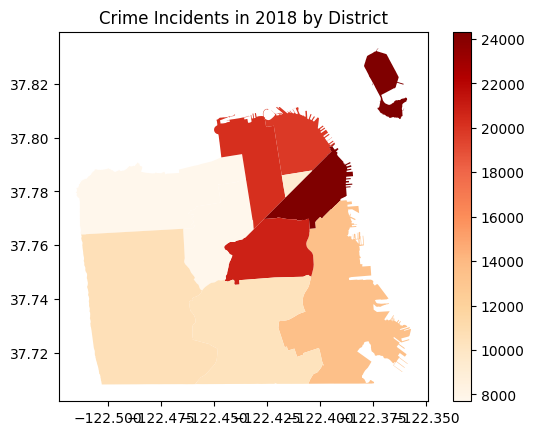

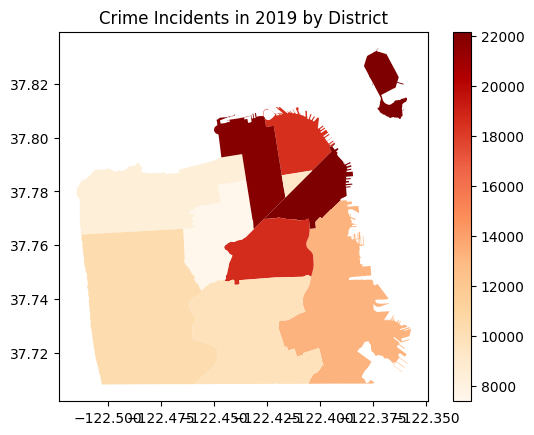

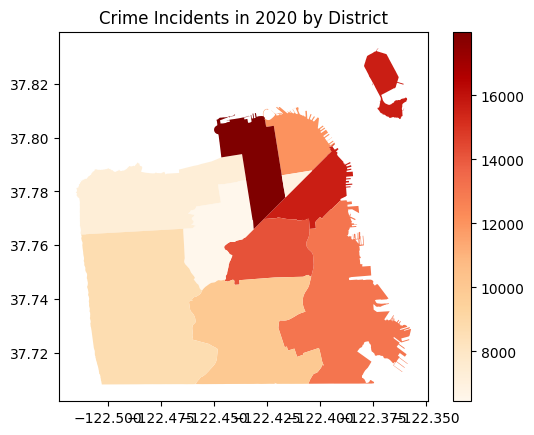

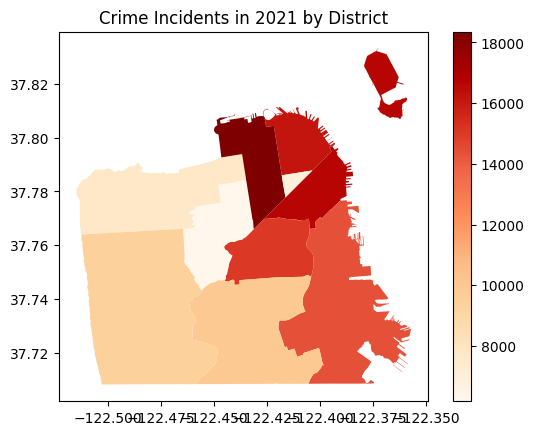

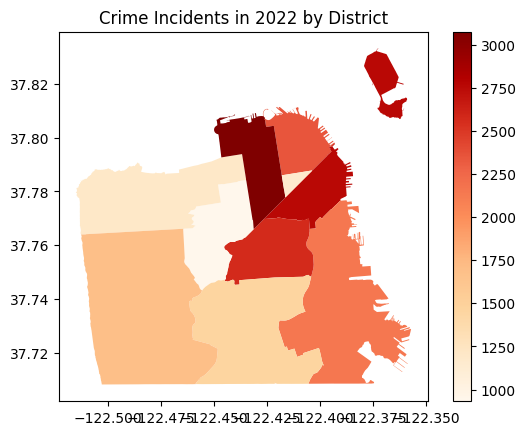

In [ ]:
# Define a list of years
years_to_map = yearly_district_incident_counts['Year'].unique()

# Iterate through each year and create choropleth maps
for year in years_to_map:
    # Filter data for the current year
    data_to_map = yearly_district_incident_counts[yearly_district_incident_counts['Year'] == year]

    # Merge data with neighborhood shapes
    district_shapes_with_data = neighborhood_shapes.merge(data_to_map, on='DISTRICT', how='left')

    # Create a choropleth map
    ax = district_shapes_with_data.plot(column='Incident Count', cmap='OrRd', linewidth=0.8, legend=True)

    # Set plot title
    plt.title(f'Crime Incidents in {year} by District')

    # Display the map
    plt.show()